In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_csv("Dataset/Customer/Customers.csv")
dataset.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
184,185,Female,41,99,39
192,193,Male,33,113,8
109,110,Male,66,63,48
156,157,Male,37,78,1
133,134,Female,31,72,71


In [6]:
# Using Elbow Methods to find the optimal number of cluster
from sklearn.cluster import KMeans

In [7]:
X = dataset.iloc[:,[3,4]].values

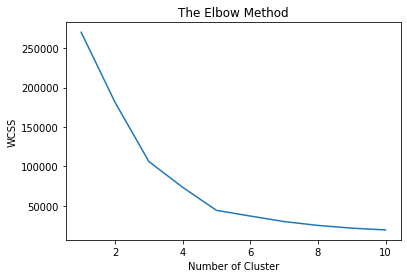

In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [11]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [12]:
# Plot the Graph

## Herical Mean Clustring

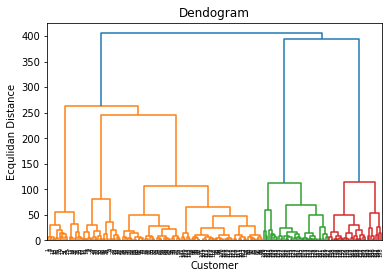

In [16]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendogram")
plt.xlabel("Customer")
plt.ylabel("Ecqulidan Distance")
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
hc = AgglomerativeClustering(n_clusters=5,linkage='ward')

In [20]:
y_hc = hc.fit_predict(X)

In [21]:
#Plot here

## Use of Sheliot Clustering

In [22]:
# Creating own dataset
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [24]:
X,y = make_blobs(n_samples=500, n_features=2,centers=4,
           cluster_std=1, center_box=(-10,10),shuffle=True)

In [25]:
X

array([[-4.34729349e+00, -5.11528399e+00],
       [ 3.16666097e+00, -1.01479084e+01],
       [ 3.46977605e+00, -3.04615067e+00],
       [ 5.22259546e+00, -7.98320581e+00],
       [ 2.35462160e+00, -2.18043199e+00],
       [ 3.43248512e+00, -2.80927101e+00],
       [ 3.19868709e+00, -4.98079298e-01],
       [-4.45566712e+00, -5.00041493e+00],
       [-8.46868378e+00,  1.47371777e+00],
       [ 3.55592328e+00, -4.00965410e+00],
       [-8.19787726e+00,  6.63393997e-01],
       [ 3.95917511e+00, -3.38925533e+00],
       [ 3.78671743e+00, -1.51992315e+00],
       [-9.62863117e+00,  7.26366771e-01],
       [ 2.84111416e+00, -9.52929724e+00],
       [ 3.04610266e+00, -8.97380652e+00],
       [ 6.15683189e+00, -6.74140171e+00],
       [ 6.16053441e+00, -8.15341184e+00],
       [-4.37486267e+00, -5.51908056e+00],
       [ 2.11995759e+00, -9.54878403e+00],
       [-7.23869137e+00,  1.17907295e+00],
       [-8.33318221e+00,  2.20528183e+00],
       [-8.26903719e+00,  1.79107326e+00],
       [ 3.

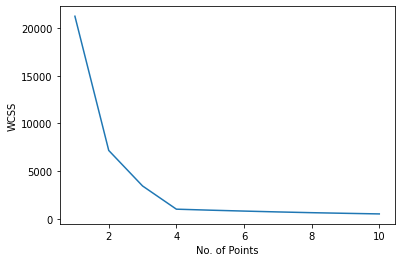

In [26]:
# Selecting Best no. of Cluster
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.ylabel("WCSS")
plt.xlabel("No. of Points")
plt.show()

In [28]:
cluster_model = KMeans(n_clusters=4)
cluster_labels = cluster_model.fit_predict(X)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,cluster_labels)

array([[  0, 124,   1,   0],
       [  0,   0,   0, 125],
       [  0,   0, 125,   0],
       [125,   0,   0,   0]], dtype=int64)